# BeyondSmile: A Challenge on Detecting Depression through Facial Behavior and Head Gestures

Welcome to the BeyondSmile Challenge tutorial! This notebook will guide you through the data format and features provided as part of the FacePsy study.

## Introduction
The dataset collected for the purpose of analyzing facial cues related to psychological well-being, with a focus on depression detection. The dataset includes:
- Facial Action Units (AUs)
- Facial landmarks
- Head pose information
- Smiling and eye-open probabilities
- Bounding box coordinates

By participating in the challenge, you can use these features to build models that detect signs of depression from facial imagery.

In this tutorial, we will:
1. Load a sample data entry.
2. Parse the Action Units and other features.
3. Visualize the facial bounding box and landmarks on the corresponding image.
4. Discuss how these features might be used in a depression detection model.

## Load and Parse the Data
The dataset will likely be provided as JSON files, each containing metadata for a single sample or for multiple samples. Below is an example of a single data entry.

We will parse this example and show how to access different features.

In [3]:
# Let's assume we have the data in a file called 'sample_data.json'.
import json

# If you have the exact JSON from the prompt saved locally as sample_data.json:
with open('./sample/sampleFeatureFile.json', 'r') as f:
    data = json.load(f)

data

{'au': {'AU01': -8.307306,
  'AU02': -13.90548,
  'AU04': -0.93210566,
  'AU06': -2.564003,
  'AU07': -3.5223238,
  'AU10': -17.682367,
  'AU12': -9.322073,
  'AU14': -11.680344,
  'AU15': -8.879589,
  'AU17': 3.3918023,
  'AU23': -5.809869,
  'AU24': -4.3802986},
 'boundingBox': '75 1170 933 1907',
 'classification': {'leftEyeOpenProbability': 0.9979193,
  'rightEyeOpenProbability': 0.99772763,
  'smilingProbability': 0.016065111},
 'contours': [{'x': 495, 'y': 1237},
  {'x': 548, 'y': 1239},
  {'x': 645, 'y': 1254},
  {'x': 714, 'y': 1286},
  {'x': 763, 'y': 1337},
  {'x': 799, 'y': 1400},
  {'x': 816, 'y': 1465},
  {'x': 825, 'y': 1539},
  {'x': 826, 'y': 1610},
  {'x': 823, 'y': 1684},
  {'x': 813, 'y': 1762},
  {'x': 792, 'y': 1842},
  {'x': 760, 'y': 1909},
  {'x': 726, 'y': 1952},
  {'x': 688, 'y': 1994},
  {'x': 651, 'y': 2021},
  {'x': 609, 'y': 2042},
  {'x': 552, 'y': 2058},
  {'x': 505, 'y': 2063},
  {'x': 460, 'y': 2058},
  {'x': 404, 'y': 2044},
  {'x': 365, 'y': 2024},
 

If you printed out `data`, you should see a dictionary structure with keys such as `au`, `boundingBox`, `classification`, `contours`, `fileName`, `headEulerAngle`, `landmarks`, and `metadata`.

Let's explore these keys and their values one by one.

In [4]:
# Print the keys:
print(data.keys())


dict_keys(['au', 'boundingBox', 'classification', 'contours', 'fileName', 'gameId', 'headEulerAngle', 'landmarks', 'metadata', 'timestamp', 'pid'])


### Action Units
Action Units (AUs) represent the activation of specific facial muscles. They are often used in affective computing to understand emotional states.

Let's look at the AUs available here and visualize them in a bar plot.

In [5]:
au_data = data['au']
au_data

{'AU01': -8.307306,
 'AU02': -13.90548,
 'AU04': -0.93210566,
 'AU06': -2.564003,
 'AU07': -3.5223238,
 'AU10': -17.682367,
 'AU12': -9.322073,
 'AU14': -11.680344,
 'AU15': -8.879589,
 'AU17': 3.3918023,
 'AU23': -5.809869,
 'AU24': -4.3802986}

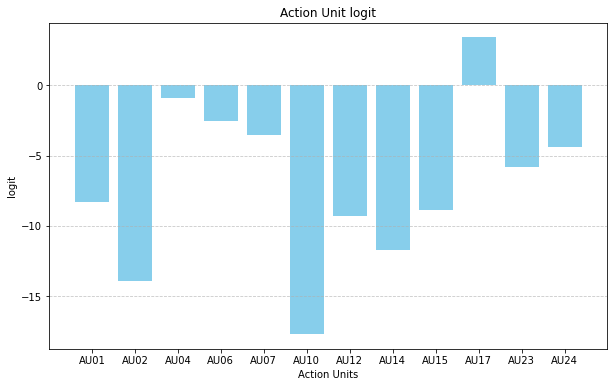

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

# Convert the AU dictionary into lists for plotting:
au_names = list(au_data.keys())
au_values = list(au_data.values())

plt.figure(figsize=(10, 6))
plt.bar(au_names, au_values, color='skyblue')
plt.title('Action Unit logit')
plt.xlabel('Action Units')
plt.ylabel('logit')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

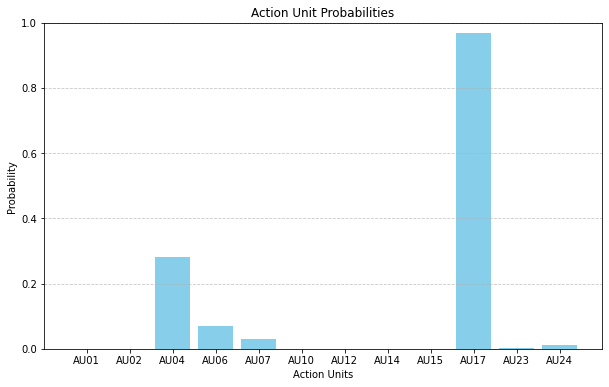

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Suppose au_data is the dictionary of AUs in logit form
au_names = list(au_data.keys())
au_values = list(au_data.values())

# Convert logit values (au_values) to probabilities
au_probabilities = [1/(1 + np.exp(-v)) for v in au_values]

# Optional: Round for nicer display
au_probabilities = [round(p, 3) for p in au_probabilities]

plt.figure(figsize=(10, 6))
plt.bar(au_names, au_probabilities, color='skyblue')
plt.title('Action Unit Probabilities')
plt.xlabel('Action Units')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Since probabilities are between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Each bar represents the intensity value for a corresponding Action Unit. Negative values might indicate the absence or lower probability of that feature, whereas positive values might represent stronger activation.

### Classification Probabilities
The dictionary includes `leftEyeOpenProbability`, `rightEyeOpenProbability`, and `smilingProbability`. These can be indicative of the subject's facial expressions.

In [8]:
classification = data['classification']
classification

{'leftEyeOpenProbability': 0.9979193,
 'rightEyeOpenProbability': 0.99772763,
 'smilingProbability': 0.016065111}

We can visualize these probabilities in a simple bar chart.

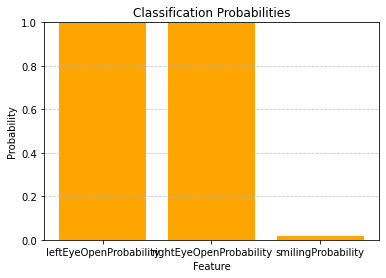

In [9]:
class_labels = list(classification.keys())
class_values = list(classification.values())

plt.figure(figsize=(6,4))
plt.bar(class_labels, class_values, color='orange')
plt.title('Classification Probabilities')
plt.xlabel('Feature')
plt.ylabel('Probability')
plt.ylim(0,1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Bounding Box
The bounding box for the face is provided. This can be used to locate the face in the image. The format is likely `x_min y_min x_max y_max` or similar, depending on your dataset documentation.

In [10]:
bbox = data['boundingBox']
print('Bounding Box:', bbox)

Bounding Box: 75 1170 933 1907


### Head Euler Angles
These angles describe the orientation of the head in 3D space. X, Y, Z correspond to pitch, yaw, and roll, respectively.


In [11]:
head_pose = data['headEulerAngle']
head_pose

{'X': 8.999751, 'Y': -0.96251166, 'Z': 0.7621726}

### Landmarks and Contours
Facial landmarks represent key points on the face (e.g., corners of the eyes, tip of the nose, mouth corners). Contours represent outlines of facial features.

We can visualize the landmarks on the corresponding image. Make sure you have an image at `face_image.jpg` (you can replace this with the image from your dataset if it's available).

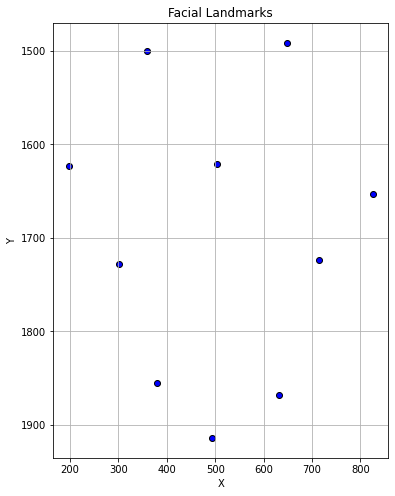

In [12]:
import matplotlib.pyplot as plt

# Suppose 'data' is already loaded from the JSON, and contains the 'landmarks' key.
landmarks = data['landmarks']

# Extract x and y coordinates of landmarks
x_coords = [lm['x'] for lm in landmarks]
y_coords = [lm['y'] for lm in landmarks]

plt.figure(figsize=(6,8))
plt.scatter(x_coords, y_coords, c='blue', edgecolor='black')

# Invert y-axis if needed since image coordinates usually start at the top-left
plt.gca().invert_yaxis()

plt.title('Facial Landmarks')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()


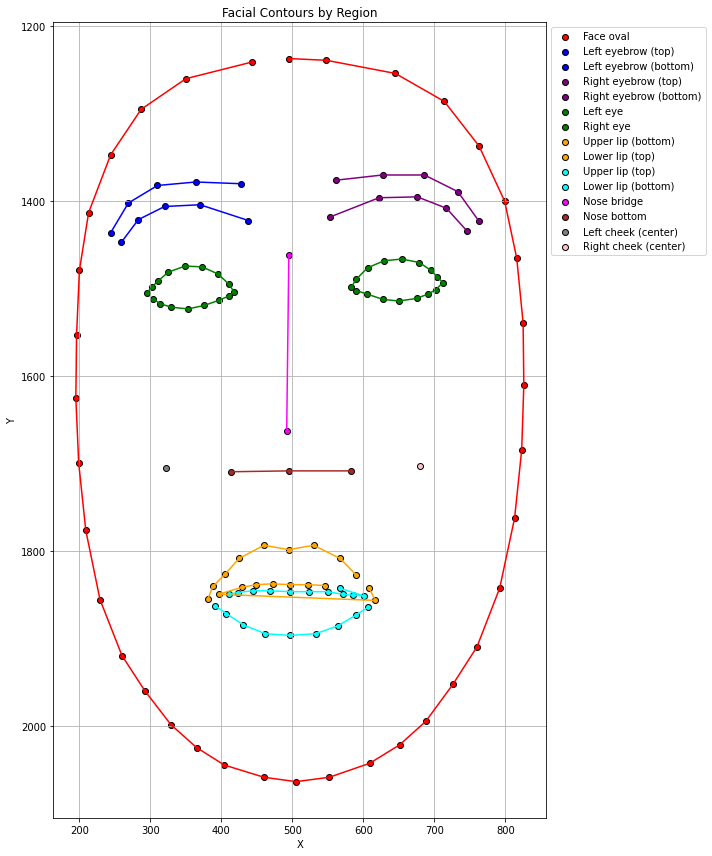

In [13]:
import matplotlib.pyplot as plt

# Contours data (list of points with x and y)
contours = data['contours']

x_contour = [point['x'] for point in contours]
y_contour = [point['y'] for point in contours]

# Face parts definition: (start_index, end_index, label, color)
# If a single index or a small set, we'll treat them individually.
face_parts = [
    ((0, 35),    'Face oval',           'red'),
    ((36, 40),   'Left eyebrow (top)',  'blue'),
    ((41, 45),   'Left eyebrow (bottom)','blue'),
    ((46, 50),   'Right eyebrow (top)', 'purple'),
    ((51, 55),   'Right eyebrow (bottom)','purple'),
    ((56, 71),   'Left eye',            'green'),
    ((72, 87),   'Right eye',           'green'),
    ((88, 96),   'Upper lip (bottom)',  'orange'),
    ((97, 105),  'Lower lip (top)',     'orange'),
    ((106, 116), 'Upper lip (top)',     'cyan'),
    ((117, 125), 'Lower lip (bottom)',  'cyan')
]

# Single / small sets of points
# Nose bridge: indices 126,127
face_parts.append(((126, 127), 'Nose bridge', 'magenta'))

# Nose bottom: indices 128-130
face_parts.append(((128, 130), 'Nose bottom', 'brown'))

# Left cheek (center): index 131 only
face_parts.append(((131, 131), 'Left cheek (center)', 'gray'))

# Right cheek (center): index 132 only
face_parts.append(((132, 132), 'Right cheek (center)', 'pink'))

plt.figure(figsize=(10, 12))

# Plot each part
for (start, end), label, color in face_parts:
    # If start == end, it's a single point
    x_part = x_contour[start:end+1]
    y_part = y_contour[start:end+1]

    # Plot the points for this part
    plt.scatter(x_part, y_part, c=color, label=label, edgecolor='black')
    
    # Optionally, connect them with a line if it's a range > 1 point
    if end > start:
        # Connect the points in order
        plt.plot(x_part, y_part, c=color)

# Invert y-axis to match typical image coordinates
plt.gca().invert_yaxis()

plt.title('Facial Contours by Region')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()


If the image is displayed inline, you'll see the bounding box in red and landmarks in blue.

### Using These Features for Depression Detection
The features extracted here can serve as inputs to various machine learning or deep learning models. For example:
- **Action Units and Probabilities:** Indicators of facial expressions that might correlate with mood or affect.
- **Head Pose:** Body language and gaze direction might be relevant.
- **Landmarks:** Can be used to compute geometric features (e.g., distances between key points) or to feed into face embedding models.

In a depression detection model, researchers often look for subtle cues in facial expressions, reduced smiling, or certain head poses. Machine learning models can be trained to associate these cues with self-reported depression scores.

### Next Steps
- Explore the full dataset of multiple samples.
- Extract summary statistics of features across different participants.
- Train a classifier (e.g., SVM, Random Forest, or a neural network) on these features with labels indicating depression levels.
- Visualize and interpret the model’s decisions to better understand which features are most relevant.

## Conclusion
This tutorial showcased how to:
- Parse the FacePsy data.
- Visualize facial features such as action units, classification probabilities, bounding boxes, and landmarks.

These steps form the foundation for using the FacePsy dataset in the depression detection challenge. With these tools, you can start exploring the relationship between facial features and psychological well-being.